<a href="https://colab.research.google.com/github/Jayzing00/SP-Netflix-Project/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Jupyter Notebook for plotting Netflix subscription costs against the number of shows you can watch.

To start, we read in all the data from a csv file, edit it a bit and then store it in a Pandas DataFrame.

In [ ]:
#Whole projet in on GitHub: https://github.com/Jayzing00/SP-Netflix-Project/tree/master

from matplotlib.pyplot import axis
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from pandas import *

col_list = ["Country_code", "Country", "LibrarySize", "No. of TV Shows", "No. of Movies", "CPM_Basic", "CPM_Standard", "CPM_Premium" ]

wholeCSV = pd.read_csv('NetflixFees.csv', usecols=col_list)

cost_list = []
cpm_list = []
netflix_abos = []

df = wholeCSV.reset_index()

for index, row in df.iterrows():
    #Abo-Preis / Library-Size  = Kosten für *eine* einzelne Show/Film
    cost_per_content = (row.CPM_Basic / row.LibrarySize)*100
    cost_list.append(cost_per_content)
    tmp_list = [row.Country, row.LibrarySize, row.CPM_Basic, cost_per_content]
    netflix_abos.append(tmp_list)


df_new = pd.DataFrame (netflix_abos, columns=["Country", "LibrarySize", "CPM_Basic" ,"cost_per_content"])
df_sort = df_new.sort_values('cost_per_content')

ylabel = ""

Once all the data has been processed, we sort it by cost and output it. At the top we see the countries that pay the least for the Netflix subscription but have the most shows at the same time.

In [ ]:
print(df_sort)

          Country  LibrarySize  CPM_Basic  cost_per_content
59         Turkey         4639       1.97          0.042466
26          India         5843       2.64          0.045182
0       Argentina         4760       3.74          0.078571
9        Colombia         4991       4.31          0.086355
5          Brazil         4972       4.61          0.092719
..            ...          ...        ...               ...
55         Sweden         4361      10.90          0.249943
13        Denmark         4558      12.00          0.263273
49     San Marino         2310       9.03          0.390909
11        Croatia         2274       9.03          0.397098
33  Liechtenstein         3048      12.88          0.422572

[65 rows x 4 columns]


Let's put our losers in graphical form. As can be seen, in Liechtenstein you pay about 0.425 cents for a show. In concrete terms, this means that the subscription is expensive and the total number of shows is rather small.

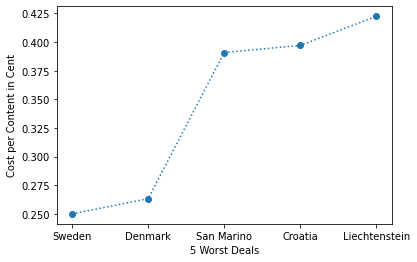

In [ ]:
x = df_sort[60:].Country
y = df_sort[60:].cost_per_content
plt.xlabel("5 Worst Deals")
plt.ylabel("Cost per Content in Cent")
plt.plot(x, y, 'o:')
plt.show()

It's a little different for our winners. Turkey wins at a cost of about 0.04 cents per show. That is 10 times better than Liechtenstein.

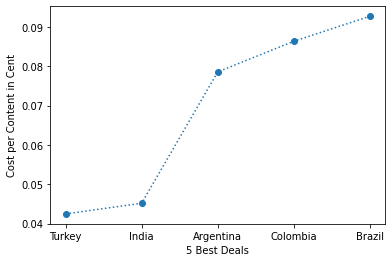

In [ ]:
x = df_sort[:5].Country
y = df_sort[:5].cost_per_content
plt.xlabel("5 Best Deals")
plt.ylabel("Cost per Content in Cent")
plt.plot(x, y, 'o:')
plt.show()